<h1>Data Related Jobs</h1>

This notebook is an EDA about data related jobs. The dateset is from [Kaggle](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries).

<h3>Libraries</h3>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import country_converter as coco

sns.set_theme()


<h3>EDA</h3>

In [2]:
df_salaries = pd.read_csv('ds_salaries.csv')  
df_salaries.head() 

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df_salaries.shape

(607, 12)

So, the dataset contains 607 rows and 12 columns.

First, we need to get rid of unused columns such as Unnamed: 0

In [4]:
df_salaries.drop(['Unnamed: 0'], axis=1, inplace=True)  

Let's look for nan or null values.

In [5]:
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [6]:
df_salaries.isnull().sum()  

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df_salaries.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

It seems like the dataset is clean.

Now, let's change the values in remote ratio: On-Site<-0, Remote<-100, Hybrid<-50 

In [8]:
df_salaries.replace([0, 50, 100], ['On-Site', 'Hybrid', 'Remote'], inplace = True)

Add country names using the [ISO](https://en.wikipedia.org/wiki/ISO_3166-2) codes for each country and using ISO 3166-3.

In [9]:
df_salaries['company_location']=coco.convert(names=df_salaries['company_location'],to='ISO3')
df_salaries['company_country']=coco.convert(names=df_salaries['company_location'],to='name_short')
df_salaries['employee_residence']=coco.convert(names=df_salaries['employee_residence'],to='ISO3')

Let us proceed by analyzing the company location info.

In [10]:
df_salaries['company_country'].value_counts().head(10)

United States     355
United Kingdom     47
Canada             30
Germany            28
India              24
France             15
Spain              14
Greece             11
Japan               6
Netherlands         4
Name: company_country, dtype: int64

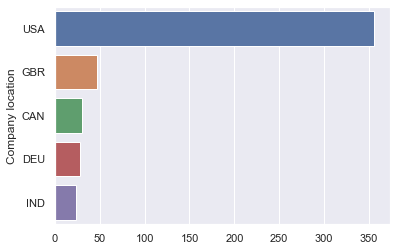

In [11]:
num_top=5
chart=sns.countplot(y = 'company_location', data= df_salaries,order=df_salaries.company_location.value_counts().iloc[:num_top].index)
chart.set_ylabel('Company location')
chart.set_xlabel('')
plt.show()

In [12]:
tmp_location=df_salaries['company_location'].value_counts()
px.choropleth(locations=tmp_location.index,color=tmp_location.values,color_continuous_scale="Reds",title='Company Location')

USA has the most number of data related jobs. Let's see how many of them are remote

In [13]:
df_salaries.groupby(['company_country','remote_ratio'])['company_location'].count().reset_index(name='count').sort_values(by='count', ascending=False)

,company_country,remote_ratio,count
82,United States,Remote,266
81,United States,On-Site,69
80,United States,Hybrid,20
78,United Kingdom,On-Site,19
12,Canada,Remote,19
...,...,...,...
47,Malaysia,Remote,1
48,Malta,Hybrid,1
50,Mexico,Remote,1
51,Moldova,On-Site,1


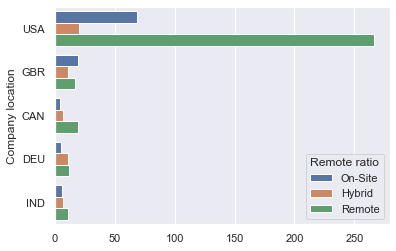

In [14]:
chart=sns.countplot(y = 'company_location', data= df_salaries,hue= 'remote_ratio',order=df_salaries.company_location.value_counts().iloc[:num_top].index)  
chart.set_ylabel('Company location')
chart.legend(title='Remote ratio')
chart.set_xlabel('')
plt.show()

So it looks like remote jobs are more popular than on-site jobs.

We are interested on finding information about remote work, for example, decrease or increase over time.

In [15]:
df_salaries.groupby(['work_year','remote_ratio'])['work_year'].count().reset_index(name='count').sort_values(by='count', ascending=False)

,work_year,remote_ratio,count
8,2022,Remote,228
5,2021,Remote,117
7,2022,On-Site,78
3,2021,Hybrid,66
2,2020,Remote,36
4,2021,On-Site,34
0,2020,Hybrid,21
1,2020,On-Site,15
6,2022,Hybrid,12


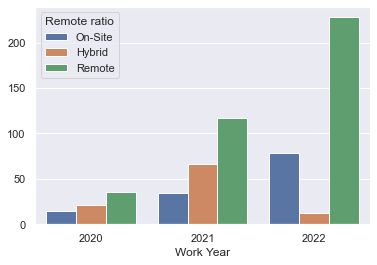

In [16]:
chart=sns.countplot(x='work_year',data= df_salaries,hue= 'remote_ratio')
chart.set_xlabel('Work Year')
chart.legend(title='Remote ratio')
chart.set_ylabel('')
plt.show()

So we see that remote working is an increasing trend, meanwhile hybrid work is less popular.

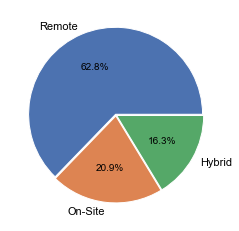

In [17]:
fig = plt.figure()
fig.patch.set_facecolor('white')
explode = (0.01, 0.01, 0.01)
plt.rcParams['text.color'] = 'black'
plt.pie(df_salaries.remote_ratio.value_counts(), labels=df_salaries.remote_ratio.value_counts().index, autopct='%1.1f%%',explode=explode)
plt.show()

Now, let's see where are located the remote workers.

In [18]:
tmp_residence=df_salaries[df_salaries['remote_ratio']=='Remote']['employee_residence'].value_counts()
px.choropleth(locations=tmp_residence.index,color=tmp_residence.values,color_continuous_scale="Reds",title='Employee Residence')

It seems like the remote workers are mostly located in the US.

Let's take a look to the salaries of the jobs.

In [19]:
df_salaries.salary_in_usd.describe()


count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

C:\Users\cozie\AppData\Local\Temp\ipykernel_4732\1954273467.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



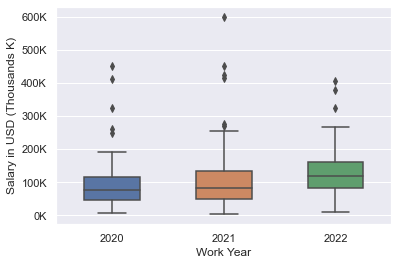

In [20]:
chart=sns.boxplot(x='work_year', y='salary_in_usd', data=df_salaries,width=0.5)
chart.set_xlabel('Work Year')
chart.set_ylabel('Salary in USD (Thousands K)')
ylabels = ['{:,.0f}'.format(x) + 'K' for x in chart.get_yticks()/1000]
chart.set_yticklabels(ylabels);
plt.show()

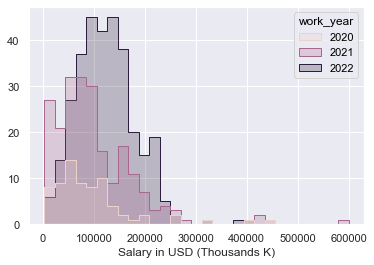

In [21]:
chart=sns.histplot(data=df_salaries,x='salary_in_usd',hue='work_year' ,stat='count',element='step')
chart.set_xlabel('Salary in USD (Thousands K)')
chart.set_ylabel('')
# chart.legend(title='Work Year')
plt.show()

There is an increasing trend in the salaries of the jobs, however extreme salaries are becoming less popular.

Let's see the number of employees troughout the years.

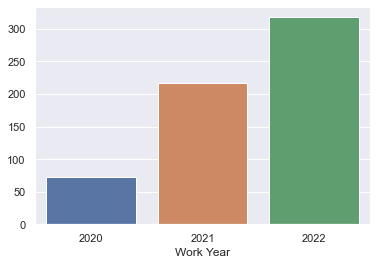

In [22]:
chart=sns.countplot(x='work_year',data= df_salaries)
chart.set_xlabel('Work Year')
chart.set_ylabel('')
plt.show()

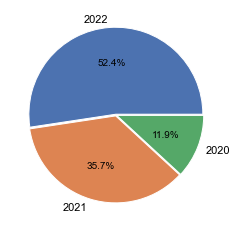

In [23]:
fig = plt.figure()
fig.patch.set_facecolor('white')
explode = (0.01, 0.01, 0.01)
plt.rcParams['text.color'] = 'black'
plt.pie(df_salaries.work_year.value_counts(), labels=df_salaries.work_year.value_counts().index, autopct='%1.1f%%',explode=explode)
plt.show()

Finally let's see the top 5 job titles by salaries(mean and median salary).

In [31]:
df_salaries.groupby(['job_title'])['salary_in_usd'].mean().sort_values(ascending=False).head(5)

job_title
Data Analytics Lead         405000.000000
Principal Data Engineer     328333.333333
Financial Data Analyst      275000.000000
Principal Data Scientist    215242.428571
Director of Data Science    195074.000000
Name: salary_in_usd, dtype: float64

In [32]:
df_salaries.groupby(['job_title'])['salary_in_usd'].median().sort_values(ascending=False).head(5)

job_title
Data Analytics Lead        405000.0
Financial Data Analyst     275000.0
Head of Data               200000.0
Principal Data Engineer    200000.0
Data Architect             180000.0
Name: salary_in_usd, dtype: float64

We see that job titles with top salaries are those with more experience, now let's look if there are entry level jobs.

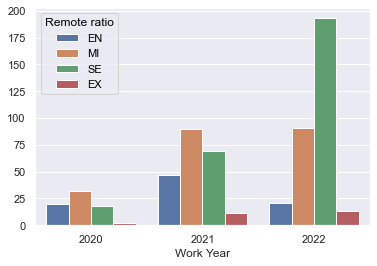

In [34]:
hue_order = ['EN', 'MI', 'SE','EX']
chart=sns.countplot(x='work_year',data= df_salaries,hue= 'experience_level',hue_order=hue_order)
chart.set_xlabel('Work Year')
chart.legend(title='Remote ratio')
chart.set_ylabel('')
plt.show()

There is a big increase for senior jobs through the years. From 2021 to 2022 the number of entry jobs has decreased significantly.

<h2>Conclusion </h2>

During the EDA, we found that data related jobs are an increasing trend, however salaries in this field are becoming more stable and less prone to increase. The number of entry level jobs is decraseing, however mid and senior jobs are increasing rapidly.

Remote work seems the preference of the data related jobs, so if you are looking for data related jobs, you should consider remote work located in the USA. 